# Reexpression

In [1]:
%run helper.py

In [3]:
import country_converter as coco

In [6]:
df = pd.read_csv("../data/ilo_minimum-wage_2025-01-30.csv").rename(columns={"Minimum wage type":"Type",
                                                                           "PPP $":"PPP_USD", "US $":"USD"})
df["ISO3"] = coco.convert(df.Country, to="ISO3")
df.head(3)

,Country (year) ^Type of minimum wage^,Country,Year,Type,PPP_USD,USD,ISO3
0,Afghanistan (2021) ^Sectoral (private sector)^,Afghanistan,2021,Sectoral (private sector),344,NaN,AFG
1,Albania (2024) ^Singular national minimum wage^,Albania,2024,Singular national minimum wage,790,NaN,ALB
2,Algeria (2024) ^Singular national minimum wage^,Algeria,2024,Singular national minimum wage,474,NaN,DZA


In [47]:
df.query("Country == 'Finland'")

,Country (year) ^Type of minimum wage^,Country,Year,Type,PPP_USD,USD,ISO3


In [69]:
eu = coco.CountryConverter().EU28as("ISO3").ISO3

In [49]:
selected = coco.CountryConverter().G20as("ISO3").ISO3

In [58]:
df_filtered = df.query("Type == 'Singular national minimum wage' and Year == 2024 and ISO3 in @selected")[["ISO3","PPP_USD"]
].sort_values("PPP_USD", ascending=False)
df_filtered.index = df_filtered.ISO3

In [72]:
reference = df.query("Type == 'Singular national minimum wage' and Year == 2024 and ISO3 in @eu")[["ISO3","PPP_USD"]].PPP_USD.mean()

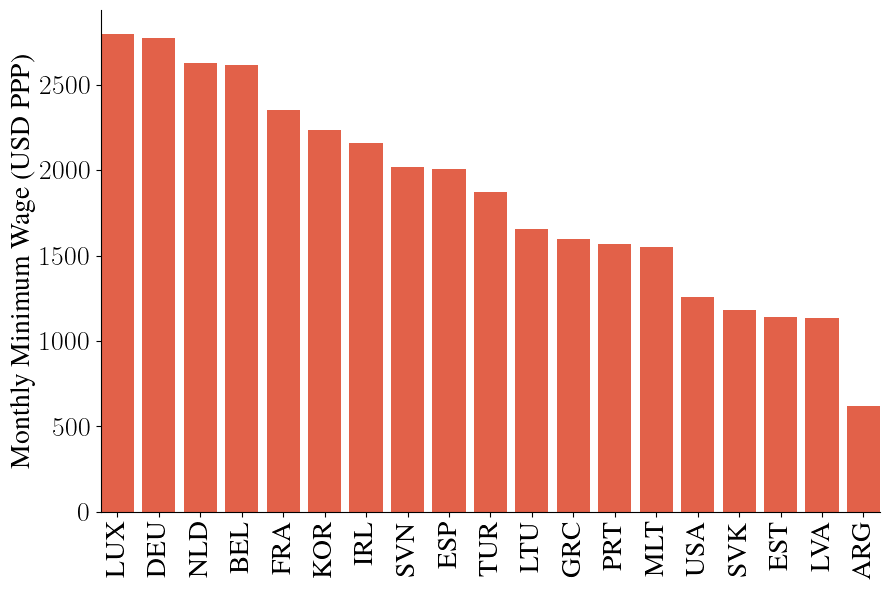

In [95]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.barplot(df_filtered, x="ISO3", y="PPP_USD", ax=ax, color=cc.glasbey_hv[1])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], rotation=90)
ax.set_ylabel("Monthly Minimum Wage (USD PPP)")
ax.set_xlabel("")
ax.set_xlim(-0.4,ax.get_xticks().max() + 0.4)
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/reexpression-minimum_wage-bar_sorted.pdf", bbox_inches="tight", transparent=True)

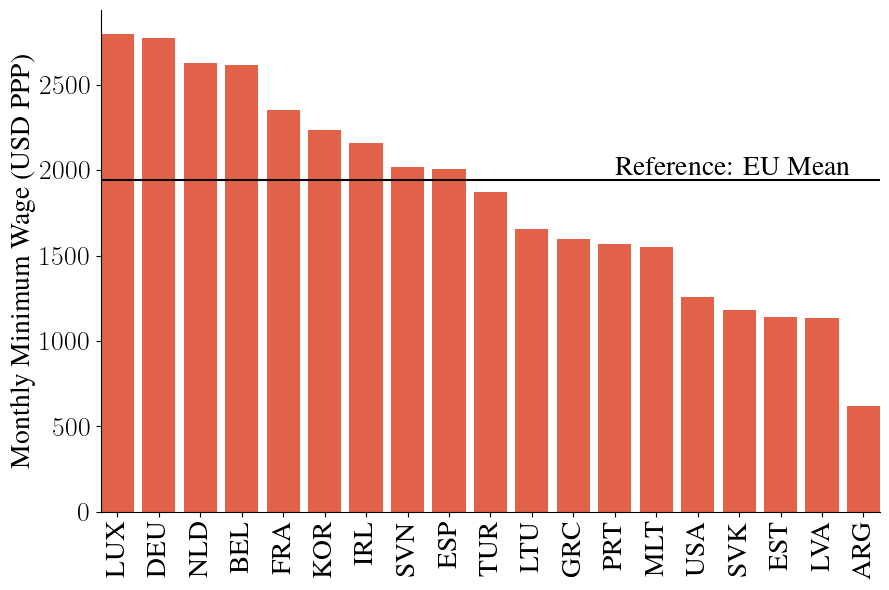

In [96]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.barplot(df_filtered, x="ISO3", y="PPP_USD", ax=ax, color=cc.glasbey_hv[1])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], rotation=90)
ax.set_ylabel("Monthly Minimum Wage (USD PPP)")
ax.hlines(y=reference, xmin=-0.4, xmax=ax.get_xticks().max() + 0.4, color="k")
ax.annotate("Reference: EU Mean", xy=(12,reference), xytext=(12,reference+30), fontsize=20)
ax.set_xlabel("")
ax.set_xlim(-0.4,ax.get_xticks().max() + 0.4)
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/reexpression-minimum_wage-bar_sorted_reference.pdf", bbox_inches="tight", transparent=True)

In [98]:
df_filtered["PPP_USD_relative"] = df_filtered.PPP_USD / reference

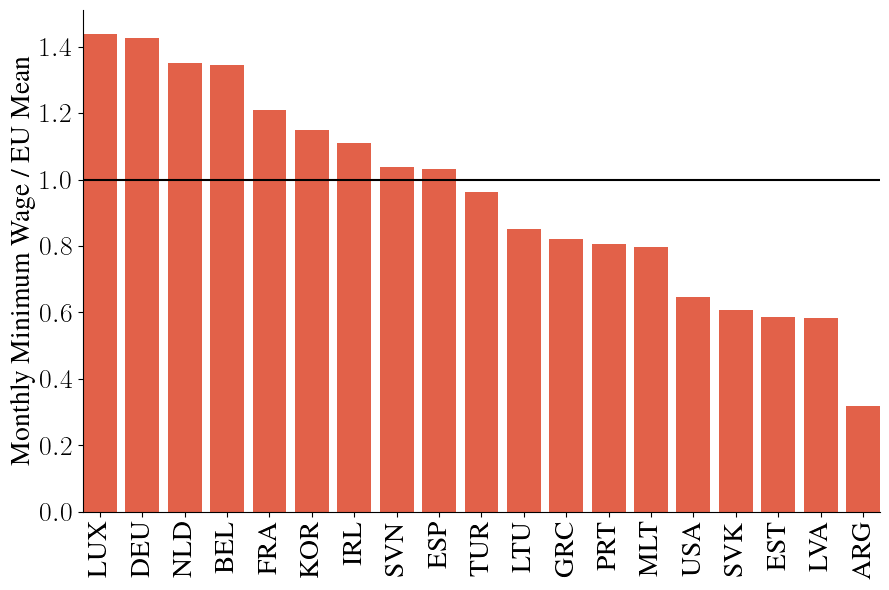

In [114]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.barplot(df_filtered, x="ISO3", y="PPP_USD_relative", ax=ax, color=cc.glasbey_hv[1])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], rotation=90)
ax.hlines(y=1, xmin=-0.4, xmax=ax.get_xticks().max() + 0.4, color="k")
# ax.annotate("Reference: EU Mean", xy=(12,1), xytext=(12,1+0.01), fontsize=20)
ax.set_ylabel("Monthly Minimum Wage / EU Mean")
ax.set_xlabel("")
ax.set_xlim(-0.4,ax.get_xticks().max() + 0.4)
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/reexpression-minimum_wage-bar_sorted_reference_relative.pdf", bbox_inches="tight", transparent=True)

In [116]:
df_filtered["PPP_USD_adjusted"] = df_filtered.PPP_USD - reference

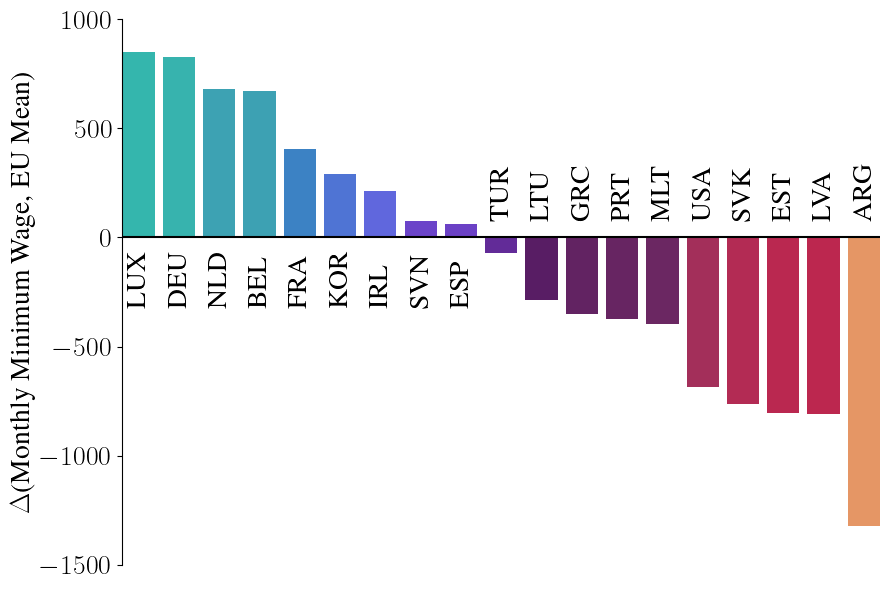

In [175]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.barplot(df_filtered, x="ISO3", y="PPP_USD_adjusted", ax=ax, hue="PPP_USD_adjusted", 
            palette=cmr.guppy, 
            legend=False)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], rotation=90)
ax.hlines(y=1, xmin=-0.4, xmax=ax.get_xticks().max() + 0.4, color="k")
for idx,country in enumerate(df_filtered.index):
    value = df_filtered.loc[country, "PPP_USD_adjusted"]
    if value > 0:
        ax.annotate(country, xy=(idx-0.3,-300), fontsize=20, rotation=90, ha="left", va="baseline")
    else:
        ax.annotate(country, xy=(idx-0.3,100), fontsize=20, rotation=90, ha="left", va="baseline")
ax.set_ylabel(r"$\Delta$(Monthly Minimum Wage, EU Mean)")
ax.set_xlabel("")
ax.set_xlim(-0.4,ax.get_xticks().max() + 0.4)
ax.set_xticks([])
ax.set_yticks([-1500,-1000,-500,0,500,1000])
sns.despine(fig, trim=True, bottom=True)
plt.tight_layout()
plt.savefig(f"../figures/reexpression-minimum_wage-bar_sorted_reference_difference.pdf", bbox_inches="tight", transparent=True)

In [178]:
df_filtered["Months_to_10k"] = df_filtered.PPP_USD.map(lambda x: 10_000/x)

In [179]:
df_filtered

,ISO3,PPP_USD,PPP_USD_relative,PPP_USD_adjusted,Months_to_10k
ISO3,,,,,
LUX,LUX,2797,1.438391,852.466667,3.575259
DEU,DEU,2771,1.425021,826.466667,3.608805
NLD,NLD,2625,1.349938,680.466667,3.809524
BEL,BEL,2614,1.344281,669.466667,3.825555
FRA,FRA,2352,1.209545,407.466667,4.251701
KOR,KOR,2236,1.149890,291.466667,4.472272
IRL,IRL,2159,1.110292,214.466667,4.631774
SVN,SVN,2020,1.038810,75.466667,4.950495
ESP,ESP,2006,1.031610,61.466667,4.985045


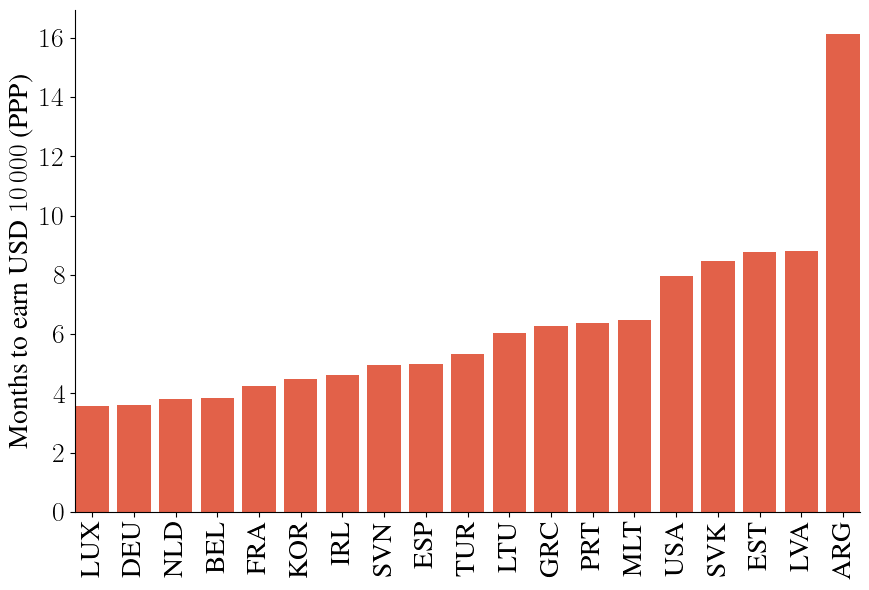

In [184]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.barplot(df_filtered, x="ISO3", y="Months_to_10k", ax=ax, color=cc.glasbey_hv[1])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], rotation=90)
ax.set_ylabel(r"Months to earn USD $10\,000$ (PPP)")
ax.set_xlabel("")
ax.set_xlim(-0.4,ax.get_xticks().max() + 0.4)
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/reexpression-minimum_wage-bar_sorted_inverted.pdf", bbox_inches="tight", transparent=True)